## 1.读取数据

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
x_df=pd.DataFrame(datasets.load_boston()['data'],columns=datasets.load_boston()['feature_names']) #X
y_df=pd.DataFrame(datasets.load_boston()['target'],columns=['y']) #Y
df=x_df.join(y_df)

In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
x1=df['RM']
x2=df['DIS']
x3=df['PTRATIO']
x4=df['LSTAT']

## 2.画出RM,DIS,PTRATIO,LSTAT与y的散点图,分析特征与y是否有线性关系

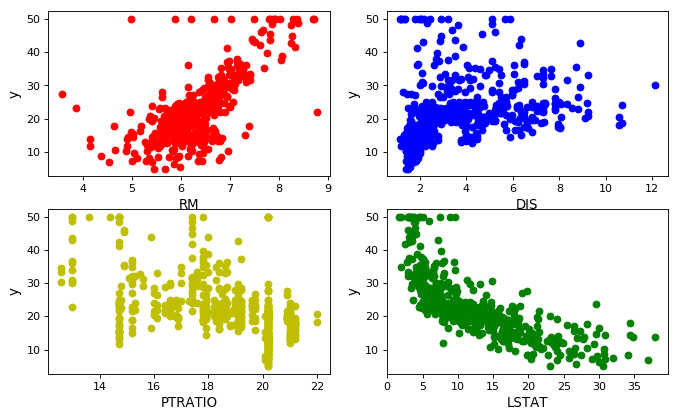

In [6]:
"""使用scatter()绘制散点图"""
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6),dpi=80)
#第一个子图
ax1 = plt.subplot(221)#分成2行2列子图
plt.scatter(x1, y_df,color="r") 
# 设置图表标题并给坐标轴加上标签

plt.xlabel('RM', fontsize=12)
plt.ylabel('y', fontsize=12)

#第二个子图
ax1 = plt.subplot(222)#分成2行2列子图
plt.scatter(x2, y_df,color="b") 
# 设置图表标题并给坐标轴加上标签
plt.xlabel('DIS', fontsize=12)
plt.ylabel('y', fontsize=12)

#第三个子图
ax1 = plt.subplot(223)#分成2行2列子图
plt.scatter(x3, y_df,color="y") 
# 设置图表标题并给坐标轴加上标签
plt.xlabel('PTRATIO', fontsize=12)
plt.ylabel('y', fontsize=12)

#第四个子图
ax1 = plt.subplot(224)#分成2行2列子图
plt.scatter(x4, y_df,color="g") 
# 设置图表标题并给坐标轴加上标签
plt.xlabel('LSTAT', fontsize=12)
plt.ylabel('y', fontsize=12)


plt.show()
 

### 通过散点图得知：RM与LSTAT与y有吸纳行相关关系，而DIS与y线性关系较弱，PTRATIO与y基本无线性关系

## 3.尝试进行线性回归,使用RM,DIS,PTRATIO,LSTAT预测房价y,写出回归方程

In [11]:
X = df.loc[:,['RM','DIS','PTRATIO','LSTAT']]

In [14]:
#最小二乘线性回归
from sklearn import linear_model
reg = linear_model.LinearRegression()
model=reg.fit(X,y_df)

In [15]:
model.coef_#X的系数[ 4.22379223, -0.55192634, -0.97364584, -0.66543598]

array([[ 4.22379223, -0.55192634, -0.97364584, -0.66543598]])

In [16]:
model.intercept_ #截距项[24.47135762]

array([24.47135762])

### 回归方程为：y = 24.27+4.22*RM-0.55*DIS-0.97*PTRATIO-0.67*LSTAT

### 当RM增加1个单位时，y平均增加4.22个单位

## 4.对某新小区,其RM=8,DIS=2,PTRATIO=12,LSTAT=22,预测该小区房价

In [19]:
model.predict([[8,2,12,22]])#该小区房价为30.8345

array([[30.83450099]])